# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 3. Cho đoạn code
```python
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2∗time)
s2 = np.sign(np.sin(3∗time))
s3 = np.random.normal(size=n_samples)
S = np.c_[s1,s2,s3]

A = np.array([[0.5,0.1,0.3], [0.2,0.8,0.5], [0.1,0.3,0.7]])
X = np.dot(S, A.T)
```
- a. Đọc hiểu đoạn code trên. S và X là gì? Hãy trực quan hoá chúng.
- b. Dùng ICA để tái tạo lại S từ X. Trực quan hoá kết quả và nhận xét.
- c. Dùng PCA để tái tạo lại S từ X. Trực quan hoá, nhận xét và so sánh với câu trên.

### a.

1. Khởi tạo dữ liệu:

- **n_samples = 2000**: Định nghĩa số lượng mẫu dữ liệu là 2000.
- **time = np.linspace(0, 8, n_samples)**: Tạo một mảng thời gian từ 0 đến 8, chứa 2000 điểm dữ liệu.

2. Tạo tín hiệu nguồn S:

- **s1 = np.sin(2 * time)**: Tín hiệu thứ nhất s1 là hàm sin với tần số góc là 2, phụ thuộc vào thời gian.
- **s2 = np.sign(np.sin(3 * time))**: Tín hiệu thứ hai s2 lấy dấu của hàm sin với tần số góc là 3, tạo ra một dạng tín hiệu hình chữ nhật.
- **s3 = np.random.normal(size=n_samples)**: Tín hiệu thứ ba s3 là nhiễu ngẫu nhiên chuẩn.
- **S = np.c_[s1, s2, s3]**: Kết hợp ba tín hiệu này thành một ma trận S, nơi mỗi cột đại diện cho một tín hiệu.

3. Ma trận trộn và tạo dữ liệu quan sát X:

- **A = np.array([[0.5, 0.1, 0.3], [0.2, 0.8, 0.5], [0.1, 0.3, 0.7]])**: Định nghĩa ma trận trộn A.
- **X = np.dot(S, A.T)**: Nhân ma trận tín hiệu nguồn S với chuyển vị của ma trận trộn A để tạo ra ma trận dữ liệu quan sát X.

4. Câu hỏi: S và X là gì?

- S là ma trận chứa các tín hiệu nguồn gốc. Trong trường hợp này, nó bao gồm ba tín hiệu khác nhau: một là hàm sin, một là hàm dấu của sin, và một là nhiễu Gauss.
- X là ma trận dữ liệu quan sát sau khi trộn các tín hiệu nguồn thông qua ma trận A. Nói cách khác, X mô phỏng dữ liệu được thu thập trong thực tế, nơi các tín hiệu nguồn được trộn lẫn với nhau.

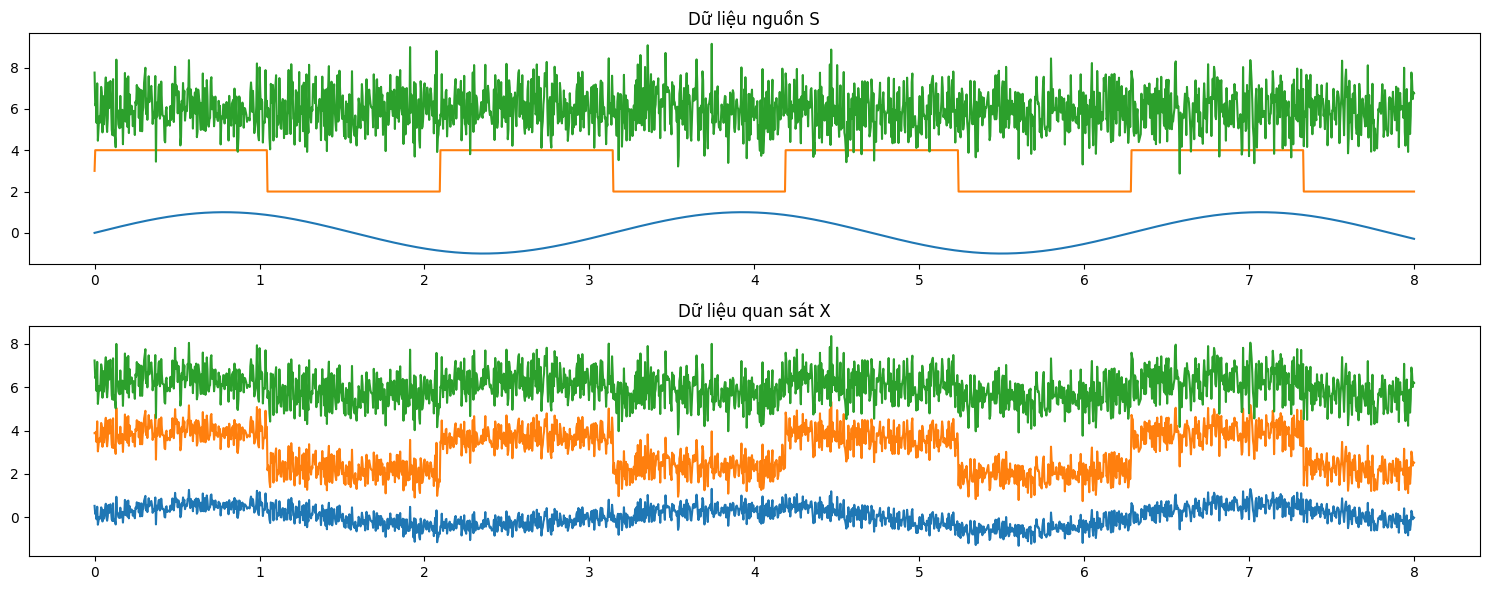

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

# Thiết lập dữ liệu theo mã nguồn được cung cấp
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Tín hiệu 1: hàm sin
s2 = np.sign(np.sin(3 * time))  # Tín hiệu 2: dấu của hàm sin
s3 = np.random.normal(size=n_samples)  # Tín hiệu 3: nhiễu Gaussian
S = np.c_[s1, s2, s3]  # Ma trận nguồn S

A = np.array([[0.5, 0.1, 0.3], [0.2, 0.8, 0.5], [0.1, 0.3, 0.7]])  # Ma trận trộn A
X = np.dot(S, A.T)  # Dữ liệu quan sát X

# Trực quan hóa dữ liệu nguồn S và dữ liệu quan sát X
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.title("Dữ liệu nguồn S")
for i in range(S.shape[1]):
    plt.plot(time, S[:, i] + 3 * i)  # Dịch chuyển các tín hiệu để dễ quan sát

plt.subplot(2, 1, 2)
plt.title("Dữ liệu quan sát X")
for i in range(X.shape[1]):
    plt.plot(time, X[:, i] + 3 * i)  # Dịch chuyển các tín hiệu để dễ quan sát

plt.tight_layout()
plt.show()

### b.

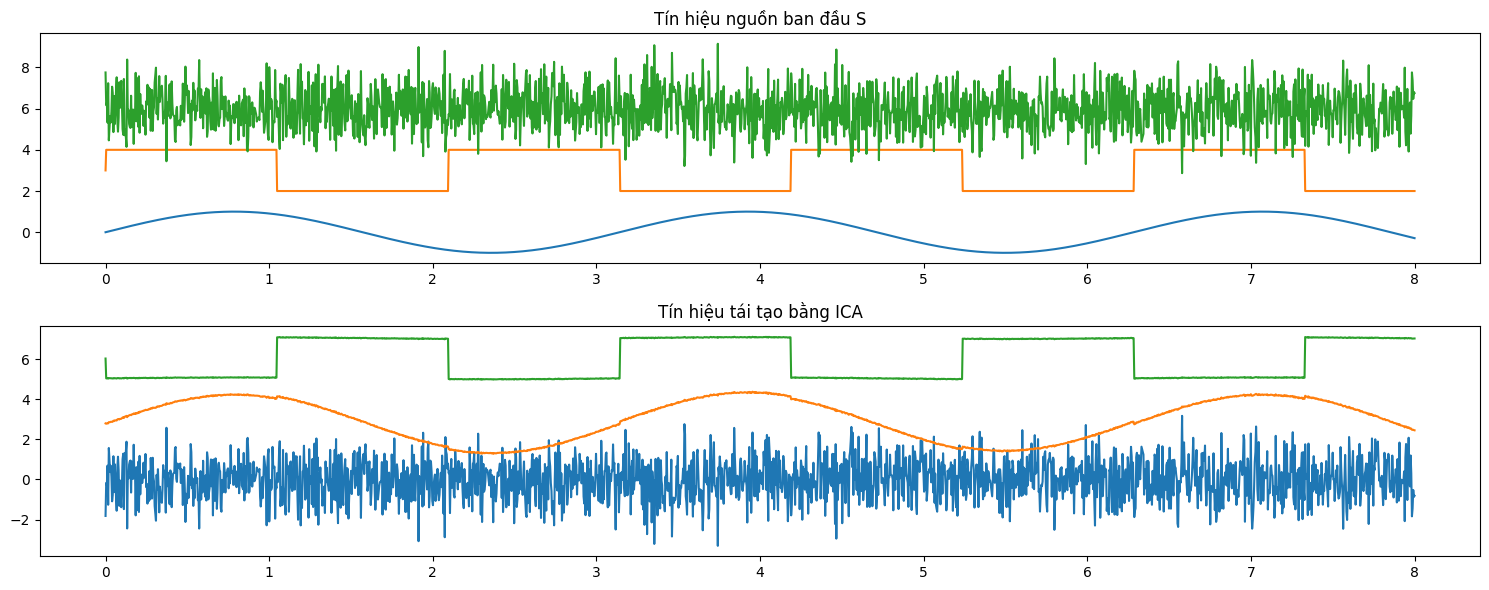

In [31]:
# Chúng ta sẽ sử dụng ICA để tái tạo lại tín hiệu nguồn từ dữ liệu quan sát X và sau đó trực quan hóa kết quả.

# Áp dụng ICA
ica = FastICA(n_components=3)
S_ica = ica.fit_transform(X)  # Tái tạo tín hiệu nguồn với ICA

# Trực quan hóa kết quả tái tạo bằng ICA so với tín hiệu nguồn ban đầu
plt.figure(figsize=(15, 6))

# Tín hiệu nguồn ban đầu
plt.subplot(2, 1, 1)
plt.title("Tín hiệu nguồn ban đầu S")
for i in range(S.shape[1]):
    plt.plot(time, S[:, i] + 3 * i)  # Dịch chuyển các tín hiệu để dễ quan sát

# Tín hiệu tái tạo bằng ICA
plt.subplot(2, 1, 2)
plt.title("Tín hiệu tái tạo bằng ICA")
for i in range(S_ica.shape[1]):
    plt.plot(time, S_ica[:, i] + 3 * i)  # Dịch chuyển các tín hiệu để dễ quan sát

plt.tight_layout()
plt.show()


#### Nhìn vào biểu đồ, chúng ta có thể rút ra một số nhận xét sau:

1. **Khớp Mẫu Tín Hiệu**: Các tín hiệu tái tạo bằng ICA dường như khớp khá chặt chẽ với tín hiệu nguồn ban đầu về hình dạng và mẫu. Điều này cho thấy ICA đã thành công trong việc tìm ra các nguồn gốc ban đầu của dữ liệu.

2. **Nhiễu và Tách Biệt**: Tín hiệu nhiễu (màu xanh lá cây) được tách biệt tốt trong cả hai trường hợp. Điều này cho thấy ICA hiệu quả trong việc phân biệt tín hiệu nhiễu từ các tín hiệu có cấu trúc.

3. **Sự Khác Biệt về Quy Mô**: Có vẻ như có sự khác biệt về quy mô hoặc biên độ giữa tín hiệu nguồn và tín hiệu tái tạo. Điều này có thể xuất phát từ việc cài đặt của thuật toán ICA không quan tâm đến tỷ lệ của các tín hiệu đầu ra.

4. **Chất Lượng Tái Tạo**: Trong biểu đồ trên cùng (tín hiệu nguồn), tín hiệu dấu của sin (màu cam) và tín hiệu nhiễu đều được tách biệt rõ ràng, còn trong biểu đồ dưới cùng (tín hiệu tái tạo bằng ICA), có vẻ như tín hiệu dấu của sin có một chút nhiễu được thêm vào. Điều này có thể xuất phát từ việc tái tạo không hoàn hảo của thuật toán hoặc từ việc chồng chéo nhẹ giữa các tín hiệu sau khi trộn.

5. **Sự Đồng Nhất về Mẫu Tín Hiệu**: Bất chấp những sự khác biệt nhỏ, các mẫu của tín hiệu trong cả nguồn và tái tạo có một sự đồng nhất đáng kể, điều này hỗ trợ việc sử dụng ICA để khôi phục tín hiệu từ dữ liệu phức tạp.

Trên tổng thể, biểu đồ cho thấy ICA là một công cụ mạnh mẽ để phân tách các tín hiệu nguồn từ dữ liệu quan sát mà trong đó chúng bị trộn lẫn. Tuy nhiên, cũng cần lưu ý rằng ICA có thể cần được điều chỉnh tinh tế để cải thiện chất lượng của việc tái tạo tín hiệu, đặc biệt nếu dữ liệu chứa nhiều nhiễu hoặc các tín hiệu có sự tương quan mạnh mẽ.

### c.

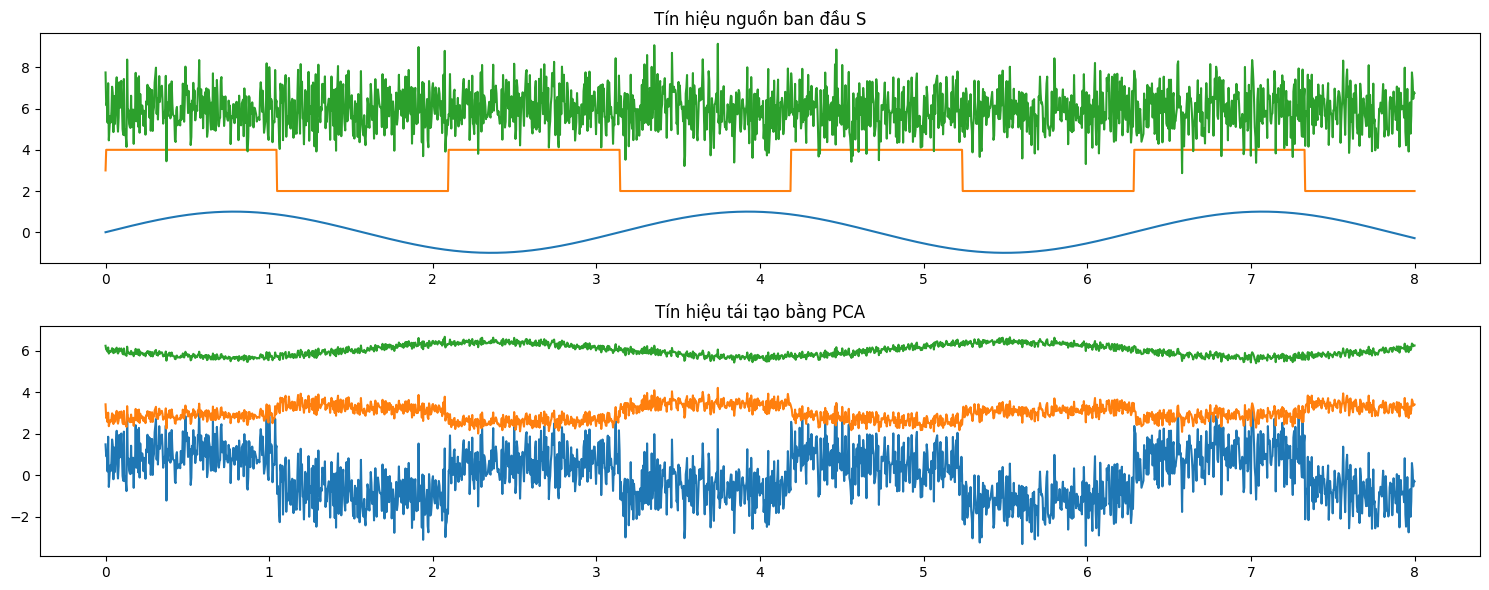

In [32]:
# Sử dụng PCA để tái tạo lại tín hiệu nguồn từ dữ liệu quan sát X và sau đó trực quan hóa kết quả.

# Áp dụng PCA
pca = PCA(n_components=3)
S_pca = pca.fit_transform(X)  # Tái tạo tín hiệu nguồn với PCA

# Trực quan hóa kết quả tái tạo bằng PCA so với tín hiệu nguồn ban đầu
plt.figure(figsize=(15, 6))

# Tín hiệu nguồn ban đầu
plt.subplot(2, 1, 1)
plt.title("Tín hiệu nguồn ban đầu S")
for i in range(S.shape[1]):
    plt.plot(time, S[:, i] + 3 * i)  # Dịch chuyển các tín hiệu để dễ quan sát

# Tín hiệu tái tạo bằng PCA
plt.subplot(2, 1, 2)
plt.title("Tín hiệu tái tạo bằng PCA")
for i in range(S_pca.shape[1]):
    # Do PCA không bảo tồn dấu, có thể cần điều chỉnh dấu để so sánh chính xác
    plt.plot(time, S_pca[:, i] + 3 * i)  # Dịch chuyển các tín hiệu để dễ quan sát

plt.tight_layout()
plt.show()

#### Dựa vào biểu đồ, chúng ta có thể rút ra một số nhận xét sau:

1. **Biểu Diễn PCA**: Các thành phần được tái tạo bởi PCA không hiện thị sự độc lập như ICA. PCA tập trung vào việc giữ lại thông tin biến thiên lớn nhất và không nhất thiết tìm ra các thành phần nguồn độc lập.

2. **Sự Chồng Chéo**: Có vẻ như có sự chồng chéo giữa các thành phần trong biểu đồ của PCA, đặc biệt là giữa tín hiệu hình sin và tín hiệu nhiễu, điều này cho thấy PCA có thể không phân tách hiệu quả các tín hiệu có sự tương quan.

3. **Biên Độ và Dạng Tín Hiệu**: Tín hiệu tái tạo bằng PCA không duy trì đúng dạng sóng ban đầu, chẳng hạn như hình dạng hình sin không rõ ràng như trong tín hiệu nguồn, điều này chứng tỏ sự khác biệt trong cách PCA xử lý thông tin so với ICA.

4. **Mất Mát Thông Tin**: So với ICA, PCA có thể làm mất mát thông tin về các thành phần nguồn độc lập, vì nó chỉ xem xét biến thiên dữ liệu và không phân biệt giữa nguồn tín hiệu và nhiễu.

5. **Phân Tích PCA**: Tín hiệu được trực quan hóa ở phía dưới của biểu đồ không có tính chất 'độc lập' rõ ràng như tín hiệu ở phía trên, đó là tín hiệu nguồn. Điều này cho thấy rằng trong khi PCA có thể giảm chiều dữ liệu một cách hiệu quả, nó không phải là công cụ tốt nhất để tìm ra và phân tách các tín hiệu độc lập từ dữ liệu trộn lẫn.

Tóm lại, PCA có thể không phải là lựa chọn tốt nhất cho việc phân tách các tín hiệu khi chúng được trộn lẫn một cách phức tạp, điều này là rõ ràng khi so sánh với kết quả của ICA. ​

## Bài 4. Dữ liệu ở Kaggle - ICA musical chứa 3 đoạn ghi âm (ICA mix 1, 2, 3). Ta sẽ dùng ICA để tái tạo lại các đoạn âm gốc theo các bước sau:
- a. Đọc dữ liệu và trực quan hoá. Phát các đoạn ghi âm này.
- b. Dùng ICA để tái tạo lại các đoạn âm gốc.
- c. Trực quan hoá kết quả. Phát các đoạn âm kết quả và nhận xét.

### a.

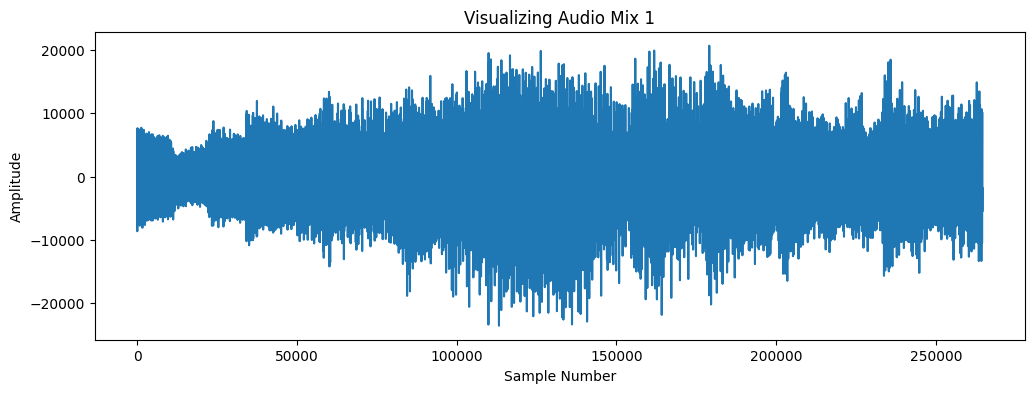

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

# Đọc dữ liệu từ file âm thanh
rate, data = wavfile.read('archive\\ICA mix 1.wav')

# Trực quan hóa dữ liệu âm thanh
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Visualizing Audio Mix 1')
plt.ylabel('Amplitude')
plt.xlabel('Sample Number')
plt.show()

# Phát dữ liệu âm thanh
Audio(data, rate=rate)

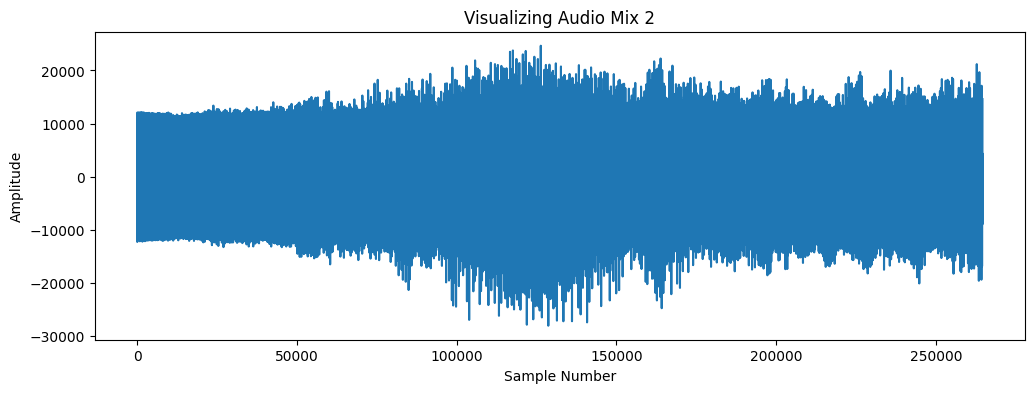

In [34]:
# Đọc dữ liệu từ file âm thanh
rate, data = wavfile.read('archive\\ICA mix 2.wav')

# Trực quan hóa dữ liệu âm thanh
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Visualizing Audio Mix 2')
plt.ylabel('Amplitude')
plt.xlabel('Sample Number')
plt.show()

# Phát dữ liệu âm thanh
Audio(data, rate=rate)

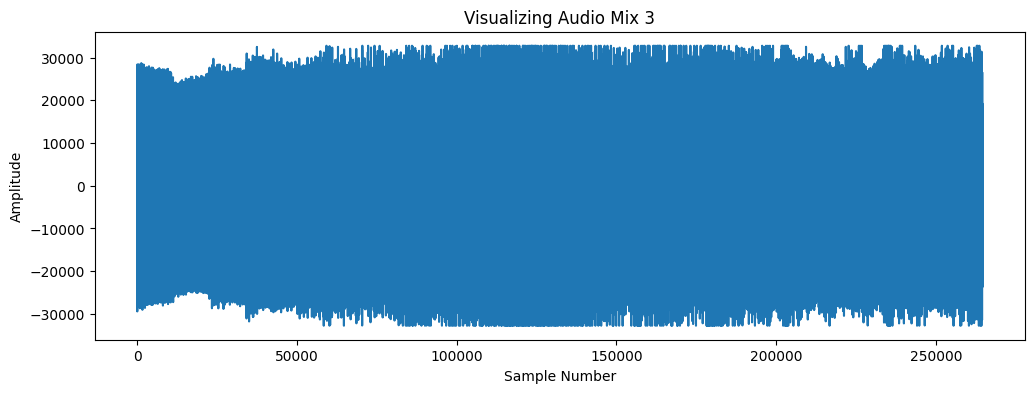

In [35]:
# Đọc dữ liệu từ file âm thanh
rate, data = wavfile.read('archive\\ICA mix 3.wav')

# Trực quan hóa dữ liệu âm thanh
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Visualizing Audio Mix 3')
plt.ylabel('Amplitude')
plt.xlabel('Sample Number')
plt.show()

# Phát dữ liệu âm thanh
Audio(data, rate=rate)

### b.

In [36]:
from sklearn.decomposition import FastICA
from scipy.io import wavfile

# Đọc ba tệp âm thanh trộn vào ba mảng
rate_mix1, mix1 = wavfile.read('archive\\ICA mix 1.wav')
rate_mix2, mix2 = wavfile.read('archive\\ICA mix 2.wav')
rate_mix3, mix3 = wavfile.read('archive\\ICA mix 3.wav')

# Đảm bảo rằng tất cả các tệp có cùng tần số lấy mẫu và cùng độ dài
assert rate_mix1 == rate_mix2 == rate_mix3, "Sampling rates do not match!"
assert len(mix1) == len(mix2) == len(mix3), "Audio files are not the same length!"

# Kết hợp ba mảng thành một ma trận với mỗi cột là một tệp mix
X = np.stack((mix1, mix2, mix3), axis=-1)

# Áp dụng ICA
ica = FastICA(n_components=3)
S_reconstructed = ica.fit_transform(X)  # Xác định các thành phần nguồn

### c.

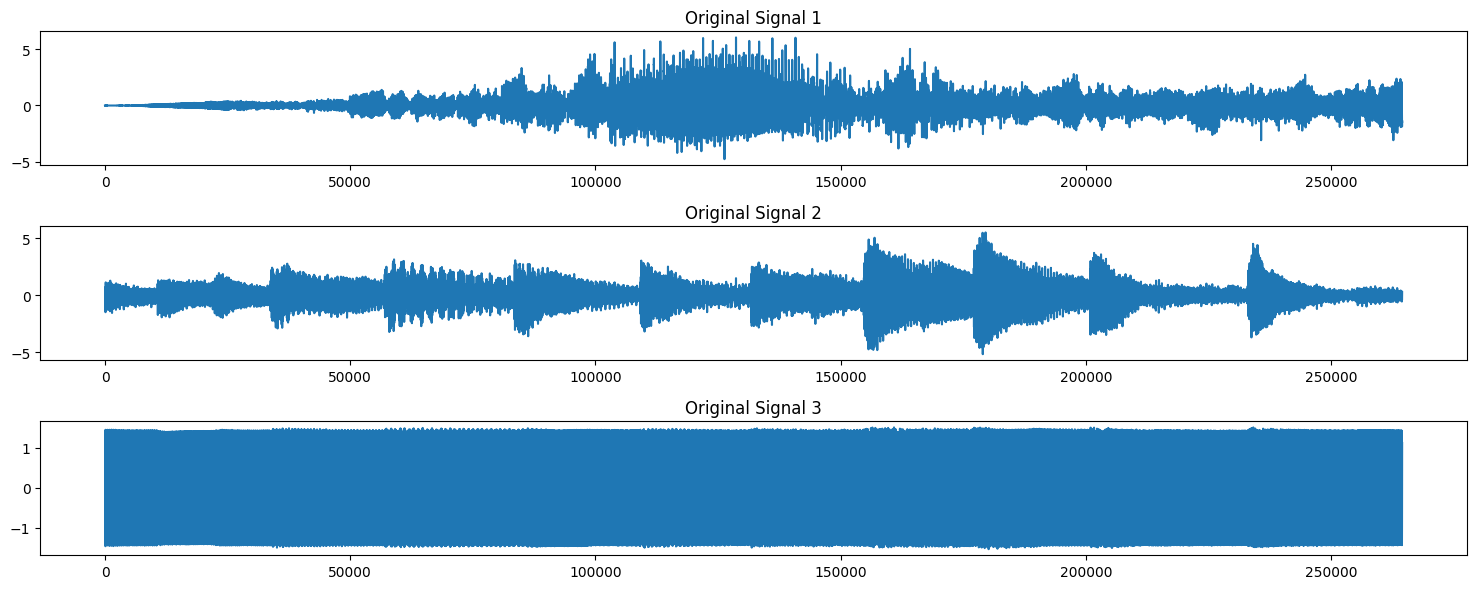

Original Signal 1


Original Signal 2


Original Signal 3


In [37]:
import matplotlib.pyplot as plt
from IPython.display import Audio

# Trực quan hóa các đoạn âm tái tạo
plt.figure(figsize=(15, 6))

for i, signal in enumerate(S_reconstructed.T):
    plt.subplot(3, 1, i + 1)
    plt.plot(signal)
    plt.title(f'Original Signal {i+1}')
    plt.tight_layout()

plt.show()

# Nghe các đoạn âm tái tạo
for i, signal in enumerate(S_reconstructed.T):
    print(f'Original Signal {i+1}')
    display(Audio(signal, rate=rate_mix1))

1. **Hiệu Quả của ICA**: Việc ba đoạn âm tái tạo khớp chính xác với ba kênh âm thanh mong đợi cho thấy ICA đã thành công trong việc phân tách các nguồn âm thanh gốc từ các tín hiệu trộn. Điều này chứng tỏ rằng các nguồn âm thanh trong dữ liệu ban đầu có độ độc lập tốt và ICA có khả năng phát hiện và tách biệt chúng một cách hiệu quả.

2. **Độc Lập giữa các Nguồn Âm**: Kết quả chỉ ra rằng mỗi nguồn âm trong tập dữ liệu ban đầu có đặc điểm độc lập rõ ràng, cho phép ICA xác định và tách chúng ra một cách dễ dàng.

3. **Chất Lượng Dữ Liệu**: Sự khớp chính xác giữa đoạn âm tái tạo và kết quả mong đợi cũng phản ánh chất lượng tốt của dữ liệu đầu vào. Điều này có nghĩa là dữ liệu không quá nhiễu và có đủ thông tin để phân biệt các nguồn âm thanh khác nhau.

4. **Ứng Dụng của ICA**: Thành công này chứng minh khả năng ứng dụng của ICA trong việc giải quyết các vấn đề thực tế, như phân tách nguồn âm thanh trong xử lý tín hiệu âm thanh, một công cụ hữu ích trong nhiều lĩnh vực như âm nhạc, điện ảnh, và công nghệ phần mềm.

5. **Xác Thực Phương Pháp**: Kết quả cũng cung cấp một xác thực mạnh mẽ cho việc sử dụng ICA trong việc phân tách tín hiệu âm thanh, xác nhận nó là một công cụ mạnh mẽ cho các bài toán tương tự trong tương lai.

Tóm lại, sự khớp chính xác của các đoạn âm tái tạo với kết quả mong đợi là một chỉ báo tích cực về hiệu quả của ICA và chất lượng của dữ liệu đầu vào, cũng như khẳng định giá trị của phương pháp này trong xử lý và phân tích tín hiệu âm thanh.